<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/IMAGE-SEGMENTATION/blob/master/IMAGE_SEGMENTATION_USING_HISTOGRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE SEGMENTATION USING HISTOGRAM

# IMPORTING LIBRARIES

In [0]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

# IMPORT IMAGE AND DISPLAY

In [0]:
img = io.imread("lena.tiff")


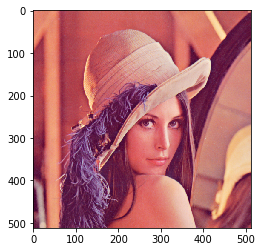

In [3]:
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

# CLEAN NOISES IN THE IMAGE

Let's clean the noise using edge preserving filter.

In [0]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float


In [0]:
float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)

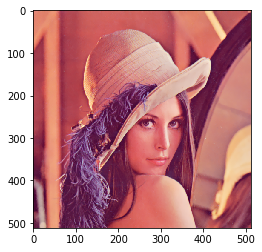

In [6]:
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

# MAKING HISTOHRAM OF IMAGE

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0000e+00, 3.1000e+01,
        8.2000e+01, 9.6000e+01, 2.2100e+02, 2.4100e+02, 3.1000e+02,
        4.4600e+02, 6.2800e+02, 6.7000e+02, 8.2100e+02, 9.9900e+02,
        1.1120e+03, 1.3410e+03, 1.5920e+03, 1.7300e+03, 2.1530e+03,
        2.1140e+03, 2.2530e+03, 2.3960e+03, 2.3030e+03, 2.4230e+03,
        2.2470e+03, 2.0310e+03, 2.0800e+03, 1.8920e+03, 1.7170e+03,
        1.5630e+03, 1.4760e+03, 1.2590e+03, 1.1770e+03, 1.1250e+03,
        1.0660e+03, 1.0020e+03, 9.8700e+02, 9.5000e+02, 9.9500e+02,
        9.6600e+02, 9.5400e+02, 9.4200e+02, 9.6700e+02, 1.0310e+03,
        1.0740e+03, 1.0310e+03, 9.6000e+02, 1.0640e+03, 1.0700e+03,
        1.1500e+03, 1.2590e+03, 1.2880e+03, 1.4530e+03, 1.6130e+03,
        1.8280e+03, 2.2500e+03, 2.4870e+03, 2.7610e+03, 3.3050e+03,
        3.8190e+03, 4.3680e+03, 4.8620e+03, 5.3090e+03, 5.6460e+03,
        5.5820e+03, 5.4340e+03, 5.2030e+03, 4.9000e+03, 4.5060e+03,
        4.4770e+03, 4.3490e+03, 4.2970e+03, 4.32

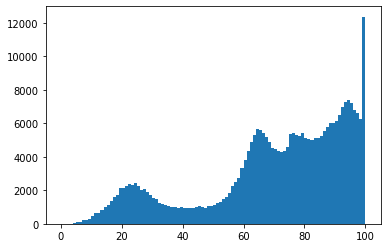

In [7]:
plt.hist(denoise_img_as_8byte.flat, bins=100, range=(0,100))

# MAKING SEGMENTS

In [0]:
segm1 = (denoise_img_as_8byte <= 57)
segm2 = (denoise_img_as_8byte > 57) & (denoise_img_as_8byte <= 110)
segm3 = (denoise_img_as_8byte > 110) & (denoise_img_as_8byte <= 210)
segm4 = (denoise_img_as_8byte > 210)


How to show all these images in single visualization?

So, we construct a new empty image with same shape as original except with 3 layers

In [0]:
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1],3))

Assigning colors to different segments in range of 0-1




In [0]:
all_segments[segm1] = 0.1
all_segments[segm2] = 0.2
all_segments[segm3] = 0.3
all_segments[segm4] = 0.4

# DISPLAY AN IMAGE

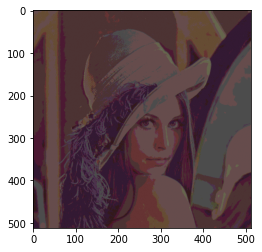

In [11]:
plt.imshow(all_segments)